In [1]:
import pandas as pd
names=['l','s','n','w','t']

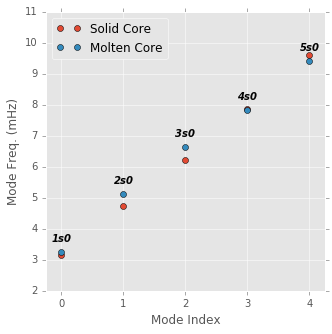

In [2]:
from matplotlib import pylab as plt
plt.style.use('ggplot')

fig = plt.figure(1,(5,5))

labels = ['Solid Core','Molten Core']

for ii, each in enumerate(['Model1','Model3']):

    df = pd.read_csv('%s.modes' % each, delim_whitespace=True,names=names)

    plt.plot(df.w,'o',label=labels[ii])

for ii, row in df.iterrows():
    #print(row)
    string = str(row.l) + str(row.s) + str(row.n)
    plt.text(ii, df.w.tolist()[ii]+0.33, string, style='italic', fontweight='bold', ha='center')
    
plt.legend(fancybox=True, loc='best')
plt.ylabel('Mode Freq. (mHz)')
plt.xlabel('Mode Index')
plt.xlim(-0.25,4.25)
plt.ylim(2,11)
plt.show()
#plt.savefig('mode_plot.png')

In [3]:
def read_eigen_file(fname):
    names = ['Radius','Eigen','_']
    df = pd.read_csv(fname, delim_whitespace=True, skiprows=1, names=names)
    df.Radius = df.Radius/1000.
    df.Eigen = df.Eigen/max(df.Eigen)
    return df

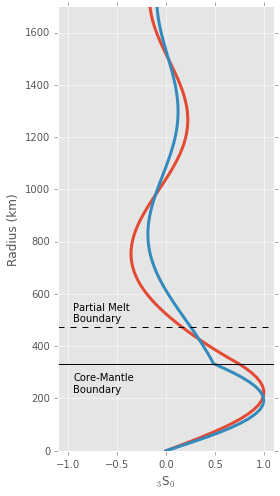

In [4]:
df1= read_eigen_file('Eigen_R_Model1_ASC_S.0000003.0000000.ASC')
df2= read_eigen_file('Eigen_R_Model3_ASC_S.0000003.0000000.ASC')

figure = plt.figure(1,(4,7))

lw=3
plt.plot(df1.Eigen, df1.Radius ,lw=lw)
plt.plot(df2.Eigen, df2.Radius,lw=lw)

plt.ylabel('Radius (km)')
plt.xlabel('$_3$S$_0$')

plt.xlim(-1.1,1.1)
plt.ylim(0,1700)
plt.axhline(333,color='black')
plt.axhline(474,linestyle='--',color='black')
plt.text(-0.95,225,'Core-Mantle\nBoundary')
plt.text(-0.95,495,'Partial Melt\nBoundary')
plt.tight_layout()
plt.savefig('eigenfuns.png')
plt.show()

In [5]:
!ls Eigen_R_Model1_ASC_S.0000003.0000000.ASC

Eigen_R_Model1_ASC_S.0000003.0000000.ASC
